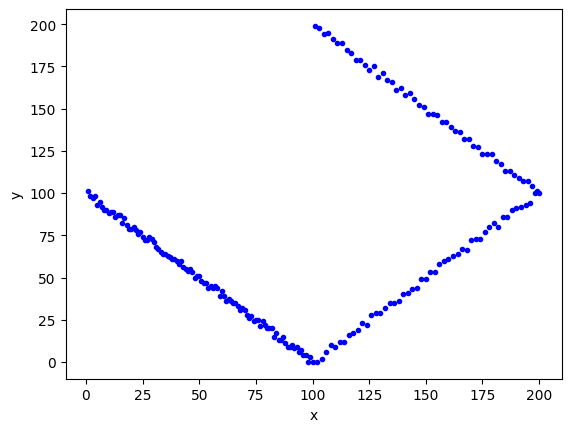

In [136]:
# HW 5 - ROOM LINES DETECTION
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from numpy.random import randint
import random

#plt.style.use('seaborn-poster')

random.seed(5)

multiplier = 20
n = 10*multiplier
f1 = 5*multiplier
f2 = 10*multiplier

x = np.linspace(1, n, n)
y = []
    
# Generate ROOM data
for i in x:
    if i < f1:
        y.append(-i+5*multiplier+random.randint(-multiplier/10, multiplier/10))
    else:
        if i % 2 == 0:
            y.append(i-5*multiplier+random.randint(-multiplier/10, multiplier/10))
        else:
            y.append(-i+15*multiplier+random.randint(-multiplier/10, multiplier/10))

plt.plot(x, y, 'b.')
#plt.plot(x, o, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

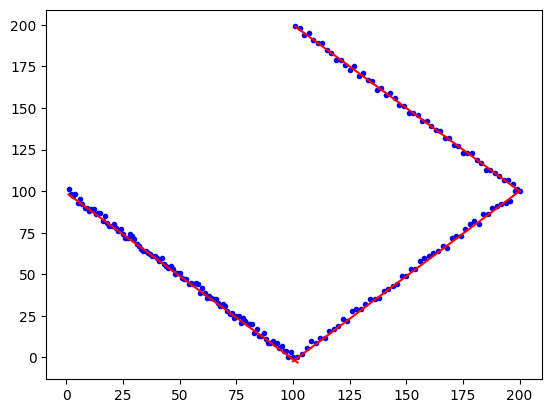

In [138]:
## RANSAC impl
def get_line(x1, y1, x2, y2):
    k = (y1 - y2) / (x1 - x2)
    b = y2 - k*x2
    return k, b

num_lines = 3
tolerance = 3
hard = 100

xs = list(x)
ys = list(y)
lines = []

def near(kx, ky):
    for mk, mb in lines:
        if ky <= mk*kx + mb + tolerance * 10 and ky >= mk*kx + mb - tolerance * 10:
            return 1
    return 0

plt.plot(x, y, 'b.', label="RAW DATA")

for num in range(num_lines):
    mx = 0
    best_k = 0
    best_b = 0
    strt = -1
    fnsh = -1
    for i in range(hard):
        tmps = -1
        tmpf = -1
        j = random.randint(0, len(xs)-1)
        g = random.randint(0, len(ys)-1)
        if j==g:
            continue
        k, b = get_line(xs[j], ys[j], xs[g], ys[g])
        if near(k, b) == 1:
            continue
        a = 0
        for h in range(n):
            xh = xs[h]
            yh = ys[h]
            if yh <= k*xh + b + tolerance and yh >= k*xh + b - tolerance:
                a = a + 1
                if xh > tmpf:
                    tmpf = xh
                if tmps == -1:
                    tmps = xh
                    
        if a > mx:
            best_k = k
            best_b = b
            mx = a
            strt = tmps
            fnsh = tmpf
            
    plt.plot(np.linspace(strt, fnsh, 100), best_k * np.linspace(strt, fnsh, 100) + best_b, 'r', label="RANSAC")
    lines.append([best_k, best_b])